In [1]:
%matplotlib inline  
import csv

data_file = "data.csv"

def dataset(path):
	with open(path,'r') as csvfile:
		reader = csv.DictReader(csvfile)
		for row in reader:
			yield row

In [2]:
import numpy as np

In [3]:
dataset = np.recfromcsv(data_file,skip_header=1)

In [4]:
dataset

rec.array([ (b'Argentina', 1933, nan, nan, nan, nan, nan, nan, nan, nan, 17.18, nan, nan, nan, 13.35, nan, nan, nan, 6.8, nan, nan, nan, nan, nan, nan, 2.39, nan, nan, False, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 3.83, nan, nan, nan, 6.55, nan, nan, nan, nan, nan, nan, nan, nan, False, 4.41, nan, nan, False, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan

In [5]:
dataset.size

2179

In [6]:
dataset.shape

(2179,)

In [7]:
names = ["country","year"]
names.extend(["col%i" % (idx+1) for idx in range(352)])

In [8]:
dtype = "S64,i4," + ",".join(["f18" for idx in range(352)])

In [9]:
dataset = np.genfromtxt(data_file,dtype=dtype,names=names,
                        delimiter=",",skip_header=1,autostrip=2)

In [10]:
import numpy.ma as ma

In [11]:
ma.masked_invalid(dataset['col1'])

masked_array(data = [-- -- -- ..., 45.2599983215332 45.5099983215332 45.599998474121094],
             mask = [ True  True  True ..., False False False],
       fill_value = 1e+20)

In [12]:
def dataset(path,country="United States"):
    """
    Extract the data for this country provided. Default is United 
    States.
    
    """
    with open(path,'r') as csvfile:
        reader = csv.DictReader(csvfile)
        for row in filter(lambda row: row["Country"]==country,
                          reader):
            yield row            

In [13]:
def timeseries(data,column):
    """
    Creates a year based time series for the given column.
    """
    for row in filter(lambda row: row[column],
                      data):
        yield (int(row["Year"]), row[column])

In [14]:
def linechart(series,**kwargs):
    fig = plt.figure()
    ax = plt.subplot(111)
    
    for line in series:
        line = list(line)
        xvals = [v[0] for v in line]
        yvals = [v[1] for v in line]
        ax.plot(xvals,yvals)
    
    if 'ylabel' in kwargs:
        ax.set_ylabel(kwargs['ylabel'])
    
    if 'title' in kwargs:
        plt.title(kwargs['title'])
        
    if 'labels' in kwargs:
        plt.legend(kwargs.get('labels'))
        
        return fig

In [15]:
def percent_income_share(source):
    
    """
    Create Income Share chart
    """
    columns = (
    "Top 10% income share",
    "Top 5% income share",
    "Top 1% income share",
    "Top 0.5% income share",
    "Top 0.1% income share",
    )
    source = list(dataset(source))
    return linechart([timeseries(source, col) for col in columns],
    labels=columns,
    title="U.S. Percentage Income Share",ylabel="Percentage")


In [16]:
import matplotlib.pyplot as plt

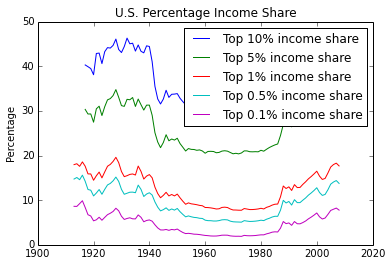

In [17]:
percent_income_share(data_file)
plt.show()

In [18]:
def normalize(data):
    """
    Normalizes the data set. Expects a timeseries input
    
    """
    data = list(data)
    norm = np.array(list(d[1] for d in data), dtype="f8")
    mean = norm.mean()
    norm /= mean
    return zip((d[0] for d in data), norm)

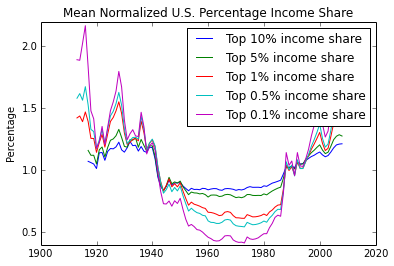

In [19]:
def mean_normalized_percent_income_share(source):
    columns = (
    "Top 10% income share",
    "Top 5% income share",
    "Top 1% income share",
    "Top 0.5% income share",
    "Top 0.1% income share",)
    source = list (dataset(source))
    
    return linechart([normalize(timeseries(source,col)) for col in 
                      columns], labels=columns,title=
                     "Mean Normalized U.S. Percentage Income Share",
                    ylabel="Percentage")
mean_normalized_percent_income_share(data_file)
plt.show()

In [20]:
def delta(first, second):
    """
    Returns an array of deltas for the two arrays.
    """
    first= list(first)
    years = yrange(first)
    first= np.array(list(d[1] for d in first), dtype="f8")
    second = np.array(list(d[1] for d in second), dtype="f8")
    # Not for use in writing
    if first.size != second.size:
        first = np.insert(first, [0,0,0,0], [None, None, None,None])
    diff = first - second
    return zip(years, diff)


In [21]:
def yrange(data):
    """
    Get the range of years from the dataset
    """
    years = set()
    for row in data:
        if row[0] not in years:
            yield row[0]
            years.add(row[0])


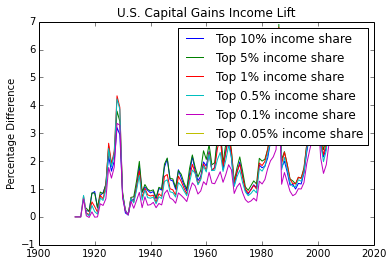

In [22]:
def capital_gains_lift(source):
    """
    Computes capital gains lift in top income percentages over
    time chart
    """
    columns = (("Top 10% income share-including capital gains",
                "Top 10% income share"),
               ("Top 5% income share-including capital gains",
                "Top 5% income share"),
               ("Top 1% income share-including capital gains",
                "Top 1% income share"),
               ("Top 0.5% income share-including capital gains",
                "Top 0.5% income share"),
               ("Top 0.1% income share-including capital gains", 
                "Top 0.1% income share"),
               ("Top 0.05% income share-including capital gains",
                "Top 0.05% income share")
              )
    source = list(dataset(source))
    series = [delta(timeseries(source,a), timeseries(source,b)) 
              for a,b in columns]
    return linechart(series,labels=list(col[1] for col in columns),
                     title="U.S. Capital Gains Income Lift",
                     ylabel="Percentage Difference")
capital_gains_lift(data_file)
plt.show()



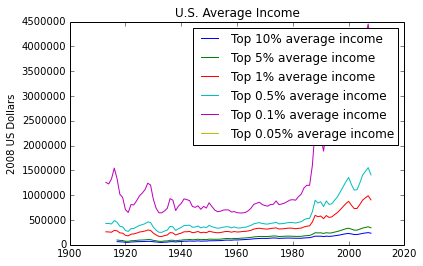

In [23]:
def average_incomes(source):
    """
    Compares percentage average incomes
    """
    columns = (
    "Top 10% average income",
    "Top 5% average income",
    "Top 1% average income",
    "Top 0.5% average income",
    "Top 0.1% average income",
    "Top 0.05% average income",
    )
    source = list(dataset(source))
    return linechart([timeseries(source, col) 
                      for col in columns], labels=columns,
                     title="U.S. Average Income",
                     ylabel="2008 US Dollars") 

average_incomes(data_file)
plt.show()


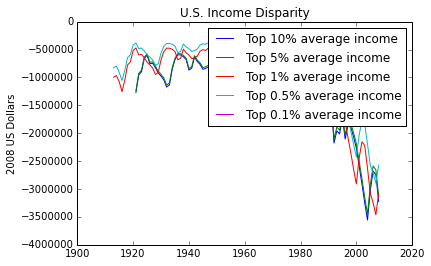

In [24]:
def average_top_income_lift(source):
    
    """
    Compares top percentage avg income over total avg
    """
    columns = (
    ("Top 10% average income", "Top 0.1% average income"),
    ("Top 5% average income", "Top 0.1% average income"),
    ("Top 1% average income", "Top 0.1% average income"),
    ("Top 0.5% average income", "Top 0.1% average income"),
    ("Top 0.1% average income", "Top 0.1% average income"),
    )
    source= list(dataset(source))
    series = [delta(timeseries(source, a), timeseries(source,b))
              for a, b in columns]
    return linechart(series,labels=list(col[0] for col in columns),
                     title="U.S. Income Disparity",
                     ylabel="2008 US Dollars")

average_top_income_lift(data_file)
plt.show()

In [25]:
def stackedarea(series, **kwargs):
    fig = plt.figure()
    axe = fig.add_subplot(111)
    fnx = lambda s: np.array(list(v[1] for v in s), dtype="f8")
    yax = np.row_stack(fnx(s) for s in series)
    xax = np.arange(1917, 2008)
    polys = axe.stackplot(xax, yax)
    axe.margins(0,0)
    
    if 'ylabel' in kwargs:
        axe.set_ylabel(kwargs['ylabel'])
    if 'labels' in kwargs:
        legendProxies = []
    for poly in polys:
        legendProxies.append(plt.Rectangle((0, 0), 1, 1,
        fc=poly.get_facecolor()[0]))
        axe.legend(legendProxies, kwargs.get('labels'))
        
    if 'title' in kwargs:
        plt.title(kwargs['title'])
    return fig


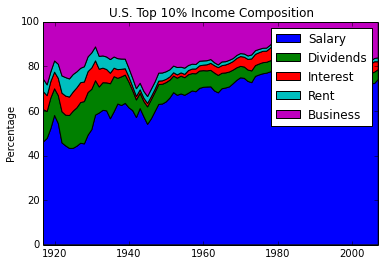

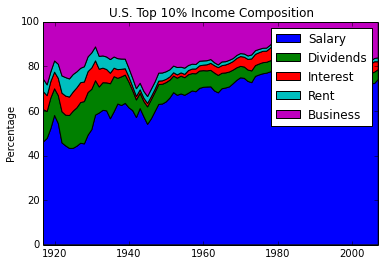

In [26]:
def income_composition(source):
    """
    Compares income composition
    """
    columns = (
    "Top 10% income composition-Wages, salaries and pensions",
    "Top 10% income composition-Dividends",
    "Top 10% income composition-Interest Income",
    "Top 10% income composition-Rents",
    "Top 10% income composition-Entrepreneurial income",
    )
    source= list(dataset(source))
    labels = ("Salary", "Dividends", "Interest", "Rent",
    "Business")
    return stackedarea([timeseries(source, col) for col in 
                        columns], 
                       labels=labels, title=
                       "U.S. Top 10% Income Composition", 
                       ylabel="Percentage")
income_composition(data_file)


In [27]:
from jinja2 import Template

In [28]:
template = Template(u'Greetings,{{name}}!')

In [29]:
template.render(name='Mr. Prealine')

'Greetings,Mr. Prealine!'

In [30]:
from jinja2 import Environment, PackageLoader, FileSystemLoader


In [31]:
import csv
import json
from datetime import datetime
from jinja2 import Environment, PackageLoader, FileSystemLoader
from itertools import groupby
from operator import itemgetter


In [32]:
def dataset(path, include):
    column = 'Average income per tax unit'
    with open(path, 'r') as csvfile:
        reader = csv.DictReader(csvfile)
        key = itemgetter('Country')
        # Use groupby: memory efficient collection by country
        for key, values in groupby(reader, key=key):
        # Only yield countries that are included
            if key in include:
                yield key, [(int(value['Year']),
                             float(value[column]))
                    for value in values if value[column]]


In [33]:
def extract_years(data):
    for country in data:
        for value in country[1]:
            yield value[0]


In [34]:
def extract_series(data, years):
    for country, cdata in data:
        cdata= dict(cdata)
        series = [cdata[year] if year in cdata else None for 
                  year in years]
        yield {
        'name': country,
        'data': series,
        }



In [35]:
def write(context):
    path = "report-%s.html" %datetime.now().strftime("%Y%m%d")
    jinjaenv = Environment(loader = FileSystemLoader('templates'))
    template = jinjaenv.get_template('Documents/Cookbook_work/report.html')
    template.stream(context).dump(path)

In [36]:
def main(source):
    # Select countries to include
    include = ("United States", "France", "Italy",
               "Germany", "South Africa", "New Zealand")
    # Get dataset from CSV
    data = list(dataset(source, include))
    years = set(extract_years(data))
    # Generate context
    context = {
        'title': "Average Income per Family, %i - %i" %
        (min(years), max(years)),
        'years': json.dumps(list(years)),
        'countries': [v[0] for v in data],
        'series': json.dumps(list(extract_series(data, years))),
    }
    # Write HTML with template
    write(context)
if __name__ == '__main__':
    source = 'data.csv'
    main(source)


TemplateNotFound: Documents/Cookbook_work/report.html